# Лабораторная работа 1
## Знакомство с Pandas

Pandas — это библиотека Python, предназначенная для быстрой загрузки и операций в первую очередь с, так называемыми, панельными данными (многомерные временные ряды).

Кроме того, она используется аналитиками и просто в качестве «Excel на стероидах».

Основное достоинство библиотеки - простая работа с файлами в форматах .csv, tsv или xls

Для того, чтобы использовать библиотеки в своей работе, необходимо сначала их импортировать в рабочую область.
Для этого, в блоке типа Code необходимо написать

import имя_библиотеки 

Например,

import pandas

Каждая команда библиотеки – это функция. Часто возникает ситуация, что в разных библиотеках функции носят одинаковые названия и, если не указать ИЗ КАКОЙ КОНКРЕТНО библиотеки необходимо использовать функцию, можно получить совершенно непредсказуемое поведение кода.

Для решения этой проблемы, функции можно импортировать как алиас, дописывая который перед командой, указывают, из какой библиотеки именно библиотеки используется функция. 

Для этого команду импорта модифицируют следующим образом:

import имя_библиотеки as название алиаса


Импортируем библиотеки Pandas и NumPy в рабочую область с указанием алиаса

In [1]:
#Все строки кода нужно запускать на выполнение!!!
#импорт библиотек
import pandas as pd
import numpy as np

### 0. Основные структуры данных в Pandas

Основными структурами данных в Pandas являются объекты Series и DataFrame. 

Они не являются универсальным решением любой задачи, 
но образуют солидную и простую для использования основу большинства приложений.

Series – одномерный, похожий на массив объект, содержащий последовательность однотипных данных и ассоциированный с ним массив меток, который называется индексом. 

Простейший объект Series состоит только из массива данных:

In [2]:
obj = pd.Series([4, 8, -3, 6])
obj

0    4
1    8
2   -3
3    6
dtype: int64

В строковом представлении Series, отображаемом в интерактивном режиме, индекс находится слева, а значения – справа. Поскольку индекс для данных не задан, то по умолчанию создается индекс, состоящий из целых чисел от 0 до N – 1 (где N – длина массива данных).

Индекс, идентифицирующий каждый элемент данных, создается непосредственно при создании объекта Series:

In [3]:
obj2 = pd.Series([4, 8, -3, 6], index=['b', 'd', 'a', 'c'])
obj2

b    4
d    8
a   -3
c    6
dtype: int64

Объект DataFrame представляет табличную структуру данных, состоящую из упорядоченной последовательности столбцов.

Каждый столбец содержит данные одного типа. В разных столбцах типы данных могут различаться.

В объекте DataFrame хранятся два индекса: по строкам и по столбцам.  

Можно считать, что это словарь объектов Series, имеющих общий индекс.  

Внутри объекта данные хранятся в виде одного или нескольких двумерных блоков, а не в виде списка, словаря или другого набора одномерных массивов.

Самый простой способ создать объект DataFrame – на основе словаря списков одинаковой длины или массивов NumPy

In [4]:
data = {
        'continent': ['Europe', ' Europe', 'Asia', 'Asia', 'North America', 'Asia'],
        'location': ['Germany', 'Italy', 'Thailand', 'China', 'USA', 'China'],
        'year': [2010, 2014, 2012, 2015, 2016, 2018]
       }
frame = pd.DataFrame(data)

Получившемуся DataFrame автоматически будет назначен индекс, как и в случае Series, и столбцы расположатся по порядку. 

В Jupyter-блокноте объекты DataFrame отображаются в виде HTML-таблицы, более удобной для браузера.

In [5]:
frame

,continent,location,year
0,Europe,Germany,2010
1,Europe,Italy,2014
2,Asia,Thailand,2012
3,Asia,China,2015
4,North America,USA,2016
5,Asia,China,2018


Для больших объектов DataFrame метод head отбирает только первые пять строк:

In [ ]:
frame.head()

При необходимости в качестве аргумента метода head можно указать требуемое число строк для вывода (меньше или больше 5). Например, три:

In [ ]:
frame.head(3)

Если задать последовательность столбцов, то столбцы DataFrame расположатся строго в указанном порядке. Например:

In [6]:
pd.DataFrame(data, columns=['year', 'location', 'continent'])

,year,location,continent
0,2010,Germany,Europe
1,2014,Italy,Europe
2,2012,Thailand,Asia
3,2015,China,Asia
4,2016,USA,North America
5,2018,China,Asia


Если запросить столбец, которого нет в data, то он будет заполнен значениями NaN. Например:


In [7]:
frame2=pd.DataFrame(data, columns=['year', 'city', 'location','continent'])
frame2

,year,city,location,continent
0,2010,NaN,Germany,Europe
1,2014,NaN,Italy,Europe
2,2012,NaN,Thailand,Asia
3,2015,NaN,China,Asia
4,2016,NaN,USA,North America
5,2018,NaN,China,Asia


Столбец DataFrame можно извлечь как объект Series, воспользовавшись нотацией словарей или c помощью атрибута:

In [9]:
frame2['location']

0     Germany
1       Italy
2    Thailand
3       China
4         USA
5       China
Name: location, dtype: object

In [8]:
frame2['year']

0    2010
1    2014
2    2012
3    2015
4    2016
5    2018
Name: year, dtype: int64

Строки также можно извлечь по позиции или по имени с помощью специального атрибута loc:

In [10]:
frame2.loc[3]

year          2015
city           NaN
location     China
continent     Asia
Name: 3, dtype: object

Столбцы можно модифицировать путем присваивания. Например, пустому столбцу 'city' можно присвоить скалярное значение или массив значений:

In [11]:
frame2['city'] = "Tyumen"
frame2

,year,city,location,continent
0,2010,Tyumen,Germany,Europe
1,2014,Tyumen,Italy,Europe
2,2012,Tyumen,Thailand,Asia
3,2015,Tyumen,China,Asia
4,2016,Tyumen,USA,North America
5,2018,Tyumen,China,Asia


In [12]:
frame2['city'] = ['Berlin','Rim','Patai','Beijing','Washington','Harbin']
frame2

,year,city,location,continent
0,2010,Berlin,Germany,Europe
1,2014,Rim,Italy,Europe
2,2012,Patai,Thailand,Asia
3,2015,Beijing,China,Asia
4,2016,Washington,USA,North America
5,2018,Harbin,China,Asia


Когда столбцу присваивается список или массив, длина значения должна совпадать с длиной DataFrame. 

Если же присваивается объект Series, то его метки будут точно выровнены с индексом DataFrame, а в «дырки» будут вставлены значения NaN.

Присваивание несуществующему столбцу приводит к созданию нового столбца. Для удаления столбцов служит ключевое слово del, как и в обычном словаре.

In [13]:
del frame2['continent']
frame2

,year,city,location
0,2010,Berlin,Germany
1,2014,Rim,Italy
2,2012,Patai,Thailand
3,2015,Beijing,China
4,2016,Washington,USA
5,2018,Harbin,China


### 1. Чтение и запись файлов в текстовом формате
Доступ к данным – обязательный первый шаг анализа данных. Если данных немного, то их можно просто ввести. 

В проектах по анализу данных, как правило, используют данные, выгруженные из внешних источников.


В библиотеке Pandas имеются различные функции для чтения табличных данных, представленных в виде объекта DataFrame. Но чаще всего приходится иметь дело с функциями read_csv и read_table


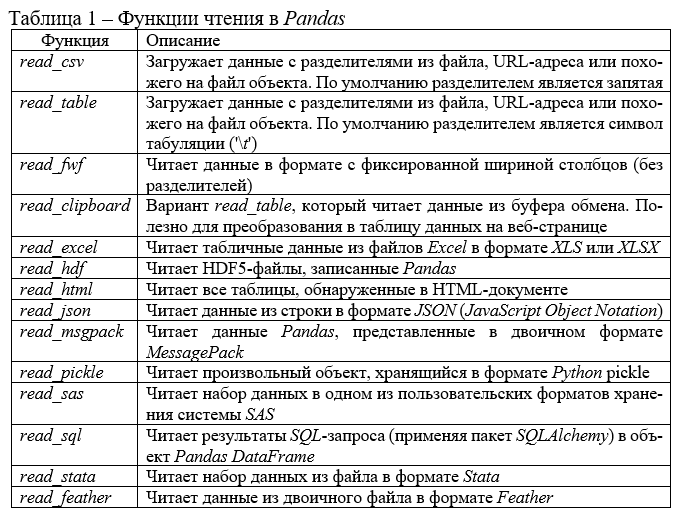

Необязательные параметры функций чтения можно отнести к нескольким категориям:

- индексирование: какие столбцы рассматривать как индекс возвращаемого DataFrame и откуда брать имена столбцов: из файла, от пользователя или вообще ниоткуда;

- выведение типа и преобразование данных: включает определенные пользователем преобразования значений и список маркеров отсутствующих данных;

- разбор даты и времени: включает средства комбинирования, в том числе сбор данных о дате и времени из нескольких исходных столбцов в один результирующий

- итерирование: поддержка обхода очень больших файлов;

- проблемы грязных данных: пропуск заголовка, комментариев и другие мелочи, например обработка числовых данных, в которых тройки разрядов разделены запятыми.


По умолчанию Jupyter настроен на работу с английской локалью. В случае английской локализации файлы отличаются тем, что:

1)	разделитель столбцов – запятая; 

2)	разделитель целой и дробной части числа – точка;

3)	формат кодировки – UTF-8. 

Ключевые отличия российской локализации csv файлов заключаются в том, что:
1)	разделителем столбцов является точка с запятой;
2)	разделителем целой и дробной части числа – запятая; 
3)	формат кодировки – чаще всего – ANSI.
Для того чтобы загрузить русские версии файлов необходимо задать соответствующие аргументы функции read_csv(): 

- Sep – задает формат разделителя колонок; 

- Encoding – кодировку; 

- Decimal – десятичный разделитель разрядов. 

Считаем содержимое файла scoring_eng.csv в переменную df: 

In [14]:
# при необходимости следует изменить пусть к файлу!!!
# используйте параметры в зависимости от локализации!!!
df = pd.read_csv ('scoring_eng.csv', decimal=',')

Проверим, что загрузилось в переменную df:

In [15]:
df.head()

,РЕЗУЛЬТАТ,ВОЗРАСТ,СТАТУС_РАБОТАЮЩИЙ,СТАТУС_ПЕНСИОНЕР,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ,ВИД_ДЕЯТЕЛЬНОСТИ,ЛИЧНЫЙ_ДОХОД,НАЛИЧИЕ_АВТО,СТАЖ_В_ОРГАНИЗАЦИИ,ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
0,0,49,1,0,1,Среднее специальное,Состою в браке,Частная компания,Вспомогательный техперсонал,5000,0,18.0,1580
1,0,32,1,0,1,Среднее,Состою в браке,Индивидуальный предприниматель,Участие в основ. деятельности,12000,0,97.0,4020
2,0,52,1,0,1,Неполное среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,9000,0,84.0,0
3,0,39,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,25000,0,168.0,1590
4,0,30,1,0,0,Среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,12000,0,101.0,2230


Для загрузки файла можно  воспользоваться функцией read_table(), указав разделитель:
df = pd.read_table ('D:\scoring_eng.csv', sep=',')

### 2. Размер данных, названия признаков и их типы


Для определения количества строк и столбцов в DataFrame используют метод shape:

In [16]:
print(df.shape)

(15223, 13)


Таблица содержит 15223 строки и 13 столбцов.

Считаем названия (индексы) столбцов:

In [17]:
print(df.columns)

Index(['РЕЗУЛЬТАТ', 'ВОЗРАСТ', 'СТАТУС_РАБОТАЮЩИЙ', 'СТАТУС_ПЕНСИОНЕР', 'ПОЛ',
       'ОБРАЗОВАНИЕ', 'СЕМЕЙНОЕ_ПОЛОЖЕНИЕ', 'ТИП_ОРГАНИЗАЦИИ',
       'ВИД_ДЕЯТЕЛЬНОСТИ', 'ЛИЧНЫЙ_ДОХОД', 'НАЛИЧИЕ_АВТО',
       'СТАЖ_В_ОРГАНИЗАЦИИ', 'ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ'],
      dtype='object')


Для получения информации по DataFrame и всем признакам используется метод info():

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   РЕЗУЛЬТАТ                   15223 non-null  int64  
 1   ВОЗРАСТ                     15223 non-null  int64  
 2   СТАТУС_РАБОТАЮЩИЙ           15223 non-null  int64  
 3   СТАТУС_ПЕНСИОНЕР            15223 non-null  int64  
 4   ПОЛ                         15223 non-null  int64  
 5   ОБРАЗОВАНИЕ                 15223 non-null  object 
 6   СЕМЕЙНОЕ_ПОЛОЖЕНИЕ          15223 non-null  object 
 7   ТИП_ОРГАНИЗАЦИИ             13856 non-null  object 
 8   ВИД_ДЕЯТЕЛЬНОСТИ            13856 non-null  object 
 9   ЛИЧНЫЙ_ДОХОД                15223 non-null  object 
 10  НАЛИЧИЕ_АВТО                15223 non-null  int64  
 11  СТАЖ_В_ОРГАНИЗАЦИИ          13855 non-null  float64
 12  ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ  15223 non-null  object 
dtypes: float64(1), int64(6), object

Изменить тип данных в столбце можно с помощью метода astype(). 

Преобразуем данные в столбце ВОЗРАСТ к типу float64:

In [19]:
df['ВОЗРАСТ'] = df['ВОЗРАСТ'].astype('float64')

С помощью команды df.head() можно убедиться, что тип данных изменился:

In [20]:
df.head()

,РЕЗУЛЬТАТ,ВОЗРАСТ,СТАТУС_РАБОТАЮЩИЙ,СТАТУС_ПЕНСИОНЕР,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ,ВИД_ДЕЯТЕЛЬНОСТИ,ЛИЧНЫЙ_ДОХОД,НАЛИЧИЕ_АВТО,СТАЖ_В_ОРГАНИЗАЦИИ,ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
0,0,49.0,1,0,1,Среднее специальное,Состою в браке,Частная компания,Вспомогательный техперсонал,5000,0,18.0,1580
1,0,32.0,1,0,1,Среднее,Состою в браке,Индивидуальный предприниматель,Участие в основ. деятельности,12000,0,97.0,4020
2,0,52.0,1,0,1,Неполное среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,9000,0,84.0,0
3,0,39.0,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,25000,0,168.0,1590
4,0,30.0,1,0,0,Среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,12000,0,101.0,2230


### 3. Индексация и извлечение данных
Датафреймы можно индексировать как по названию столбца или строки, так и по порядковому номеру. 

Для индексации по названию используется метод loc, по номеру — iloc. 

Метод iloc «работает» как обычно: учитываются значения от начального до конечного не включительно, 

при использовании метода loc учитывается и начало и конец среза.


In [21]:
df.loc[0:5, 'ПОЛ':'ТИП_ОРГАНИЗАЦИИ']

,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ
0,1,Среднее специальное,Состою в браке,Частная компания
1,1,Среднее,Состою в браке,Индивидуальный предприниматель
2,1,Неполное среднее,Состою в браке,Государственная комп./учреж.
3,1,Высшее,Состою в браке,Государственная комп./учреж.
4,0,Среднее,Состою в браке,Государственная комп./учреж.
5,0,Среднее,Гражданский брак,Частная компания


In [22]:
df.iloc[0:5, 4:7]

,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ
0,1,Среднее специальное,Состою в браке
1,1,Среднее,Состою в браке
2,1,Неполное среднее,Состою в браке
3,1,Высшее,Состою в браке
4,0,Среднее,Состою в браке


Для извлечения первой или последней строки датафрейма, используются конструкции df[:1] и df[-1:]:

In [ ]:
df[-1:]

In [ ]:
df[:1]

### 4. Сортировка данных
DataFrame можно отсортировать по значению какого-нибудь из признаков. 

Для сортировки можно использовать метод sort_values(). 

По умолчанию выполняется сортировка по возрастанию. 

Для сортировки по убыванию следует указать аргумент ascending=False.


In [ ]:
df.sort_values(by='СТАЖ_В_ОРГАНИЗАЦИИ', ascending= False).head()

Сортировку можно выполнять и по группе столбцов:

In [ ]:
df.sort_values(by=['ЛИЧНЫЙ_ДОХОД','СТАЖ_В_ОРГАНИЗАЦИИ'], ascending=[False, False]).head()

### 5. Описательные и сводные статистики
Объекты Pandas оснащены набором стандартных математических и статистических методов. 

Большая их часть попадает в категорию редукций, или сводных статистик, – методов, которые вычисляют единственное значение (например, сумму или среднее) для Series или объект Series – для строк либо столбцов DataFrame.


Метод sum() объекта DataFrame возвращает Series, содержащий суммы по столбцам. Если передать параметр axis=1, то суммирование будет производиться по строкам. 

Методы idxmin и idxmax, возвращают индексы, при котором достигается минимум или максимум.

Метод describe(), который возвращает несколько сводных статистик за одно обращение:

In [23]:
df.describe()

,РЕЗУЛЬТАТ,ВОЗРАСТ,СТАТУС_РАБОТАЮЩИЙ,СТАТУС_ПЕНСИОНЕР,ПОЛ,НАЛИЧИЕ_АВТО,СТАЖ_В_ОРГАНИЗАЦИИ
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.385500e+04
mean,0.119030,40.406096,0.909610,0.134468,0.654536,0.116337,2.922120e+02
std,0.323835,11.601068,0.286748,0.341165,0.475535,0.320844,2.436483e+04
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,2.400000e+01
50%,0.000000,39.000000,1.000000,0.000000,1.000000,0.000000,4.800000e+01
75%,0.000000,50.000000,1.000000,0.000000,1.000000,0.000000,1.100000e+02
max,1.000000,67.000000,1.000000,1.000000,1.000000,2.000000,2.867959e+06


Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре include: 

In [24]:
df.describe(include=['object','bool'])

,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ,ВИД_ДЕЯТЕЛЬНОСТИ,ЛИЧНЫЙ_ДОХОД,ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
count,15223,15223,13856,13856,15223,15223
unique,7,5,5,10,274,993
top,Среднее специальное,Состою в браке,Частная компания,Участие в основ. деятельности,10000,0
freq,6518,9416,6523,11452,1764,13301


Можно также задать include='all', чтоб вывести статистику по всем имеющимся признакам:

In [25]:
df.describe(include='all')

,РЕЗУЛЬТАТ,ВОЗРАСТ,СТАТУС_РАБОТАЮЩИЙ,СТАТУС_ПЕНСИОНЕР,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ,ВИД_ДЕЯТЕЛЬНОСТИ,ЛИЧНЫЙ_ДОХОД,НАЛИЧИЕ_АВТО,СТАЖ_В_ОРГАНИЗАЦИИ,ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223,15223,13856,13856,15223,15223.000000,1.385500e+04,15223
unique,NaN,NaN,NaN,NaN,NaN,7,5,5,10,274,NaN,NaN,993
top,NaN,NaN,NaN,NaN,NaN,Среднее специальное,Состою в браке,Частная компания,Участие в основ. деятельности,10000,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,6518,9416,6523,11452,1764,NaN,NaN,13301
mean,0.119030,40.406096,0.909610,0.134468,0.654536,NaN,NaN,NaN,NaN,NaN,0.116337,2.922120e+02,NaN
std,0.323835,11.601068,0.286748,0.341165,0.475535,NaN,NaN,NaN,NaN,NaN,0.320844,2.436483e+04,NaN
min,0.000000,21.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+00,NaN
25%,0.000000,30.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2.400000e+01,NaN
50%,0.000000,39.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,4.800000e+01,NaN
75%,0.000000,50.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.100000e+02,NaN


Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts(). 

Проанализируем распределение переменной образование:

In [26]:
df['ОБРАЗОВАНИЕ'].value_counts()

ОБРАЗОВАНИЕ
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: count, dtype: int64

Значение параметра normalize=True позволяет посмотреть не абсолютные, а относительные частоты. 

Например, возвратим доли лиц с разным семейным статусом:

In [27]:
df['СЕМЕЙНОЕ_ПОЛОЖЕНИЕ'].value_counts(normalize=True)

СЕМЕЙНОЕ_ПОЛОЖЕНИЕ
Состою в браке        0.618538
Не состоял в браке    0.237929
Разведен(а)           0.081784
Вдовец/Вдова          0.038626
Гражданский брак      0.023123
Name: proportion, dtype: float64

Полный список сводных статистик и родственных методов приведен в таблице 2.
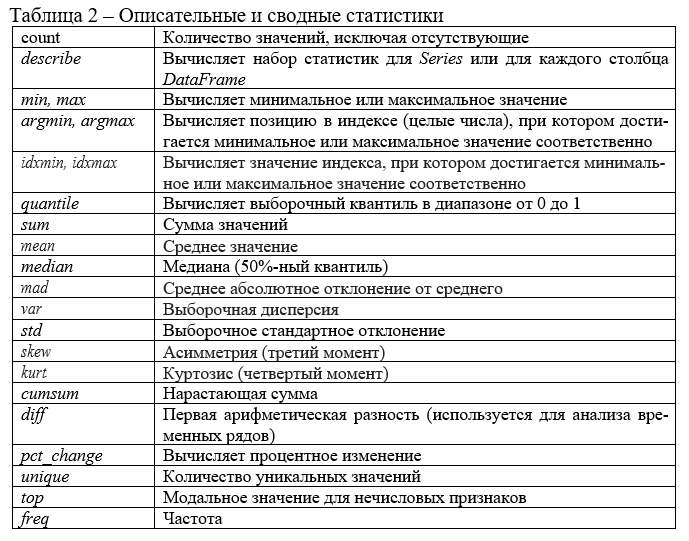

Как уже было показано выше, для извлечения отдельного столбца используется конструкция DataFrame['Name']. 

Воспользуемся этим для ответа на вопрос: какова доля владельцев авто?

In [28]:
df['НАЛИЧИЕ_АВТО'].mean()

0.11633712146094725

В Pandas есть возможность извлекать данные, удовлетворяющие заданным условиям. 

Например, вычислим средние характеристики владельцев автомобилей.

In [30]:
df[df['НАЛИЧИЕ_АВТО'] == 1].value_counts()

РЕЗУЛЬТАТ  ВОЗРАСТ  СТАТУС_РАБОТАЮЩИЙ  СТАТУС_ПЕНСИОНЕР  ПОЛ  ОБРАЗОВАНИЕ          СЕМЕЙНОЕ_ПОЛОЖЕНИЕ  ТИП_ОРГАНИЗАЦИИ                 ВИД_ДЕЯТЕЛЬНОСТИ               ЛИЧНЫЙ_ДОХОД  НАЛИЧИЕ_АВТО  СТАЖ_В_ОРГАНИЗАЦИИ  ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
1          30.0     1                  0                 0    Среднее              Состою в браке      Государственная комп./учреж.    Участие в основ. деятельности  15000         1             72.0                0                             2
0          33.0     1                  0                 0    Среднее              Состою в браке      Частная компания                Участие в основ. деятельности  25000         1             24.0                0                             2
           27.0     1                  0                 0    Высшее               Не состоял в браке  Частная компания                Участие в основ. деятельности  20000         1             24.0                0                             2
           22.0     1

Эти возможности можно комбинировать. Например, вычислим среднее значение личного дохода лиц, получивших кредит. 

In [31]:
df[df['РЕЗУЛЬТАТ'] == 1]['ВОЗРАСТ'].mean()

37.1280353200883

Функция DataFrame.apply(func, axis=0) позволяет передать функцию и применить ее к каждому отдельному значению серии Pandas:


 - func: это функция, которая применяется к каждому столбцу или строке;
 - axis: значение по умолчанию 0. Это ось, вдоль которой применяется функция: 0 или «index»: функция применяется к каждому из столбцов; 1 или «columns»: функция применяется к каждой из строк.
 
 
Эта функция улучшает возможности библиотеки, поскольку помогает разделять данные в соответствии с требуемыми условиями. 


По умолчанию result_type=None, а окончательный тип возвращаемого значения выводится из типа возвращаемого значения примененной функции. В противном случае это зависит от аргумента result_type.


Применим функцию max из библиотеки NumPy к каждому столбцу из последних четырех столбцов:

In [32]:
new_df = df.loc[:, 'ЛИЧНЫЙ_ДОХОД':'ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ']

In [33]:
new_df.apply(np.max, axis=0)

ЛИЧНЫЙ_ДОХОД                       9900
НАЛИЧИЕ_АВТО                          2
СТАЖ_В_ОРГАНИЗАЦИИ            2867959.0
ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ       997.66
dtype: object

Если функцию требуется применить к каждой ячейке столбца, то удобнее всего использовать связку apply-lambda. 


Отобразим лиц, у которых вид образования начинается с буквы В:

In [34]:
df[df['ОБРАЗОВАНИЕ'].apply(lambda state:state[0] == 'В')].head()

,РЕЗУЛЬТАТ,ВОЗРАСТ,СТАТУС_РАБОТАЮЩИЙ,СТАТУС_ПЕНСИОНЕР,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ,ВИД_ДЕЯТЕЛЬНОСТИ,ЛИЧНЫЙ_ДОХОД,НАЛИЧИЕ_АВТО,СТАЖ_В_ОРГАНИЗАЦИИ,ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
3,0,39.0,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,25000,0,168.0,1590
6,0,35.0,1,0,0,Высшее,Разведен(а),Государственная комп./учреж.,Участие в основ. деятельности,15000,0,6.0,0
8,0,53.0,1,0,0,Высшее,Состою в браке,Частная компания,Участие в основ. деятельности,100000,0,156.0,0
14,0,38.0,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,20000,0,120.0,0
15,1,41.0,1,0,1,Высшее,Разведен(а),Индивидуальный предприниматель,Участие в основ. деятельности,60000,0,168.0,0


Для получения новых данных можно добавлять столбцы:

In [ ]:
df['ДОЛГОВАЯ_НАГРУЗКА'] = df['ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ'] / df['ЛИЧНЫЙ_ДОХОД']

In [36]:
df.head()

,РЕЗУЛЬТАТ,ВОЗРАСТ,СТАТУС_РАБОТАЮЩИЙ,СТАТУС_ПЕНСИОНЕР,ПОЛ,ОБРАЗОВАНИЕ,СЕМЕЙНОЕ_ПОЛОЖЕНИЕ,ТИП_ОРГАНИЗАЦИИ,ВИД_ДЕЯТЕЛЬНОСТИ,ЛИЧНЫЙ_ДОХОД,НАЛИЧИЕ_АВТО,СТАЖ_В_ОРГАНИЗАЦИИ,ВЫПЛАТЫ_ПО_ДРУГИМ_КРЕДИТАМ
0,0,49.0,1,0,1,Среднее специальное,Состою в браке,Частная компания,Вспомогательный техперсонал,5000,0,18.0,1580
1,0,32.0,1,0,1,Среднее,Состою в браке,Индивидуальный предприниматель,Участие в основ. деятельности,12000,0,97.0,4020
2,0,52.0,1,0,1,Неполное среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,9000,0,84.0,0
3,0,39.0,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,25000,0,168.0,1590
4,0,30.0,1,0,0,Среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,12000,0,101.0,2230


Чтобы удалить ненужные столбцы или строки, используется метод drop, передавая в качестве аргумента нужные индексы и требуемое значение параметра axis (1 – для удаления столбцов, и ничего или 0 – для удаления строк):

In [ ]:
df = df.drop (['ДОЛГОВАЯ_НАГРУЗКА'], axis=1)
df.drop ([1,2]).head()